# Heart Diagnosis Using Electrocardiogram Measurements

## HW-Shapes ECE 594N W23
### Authors: [Nima Namazi](mailto:mnamazi@ece.ucsb.edu) & [Monsij Biswal](mbiswal@ece.ucsb.edu)

- Welcome to the visualization notebook !



**Introduction**

The dataset used for this project is about 12-lead electrocardiogram signals created by Chapman University and Shaoxing People's Hospital [1]. Below are some key aspects of the dataset:

- 12-lead ECG Database consists of arrhythmia research covering more than 10,646 patients. 
- Sampled at 500 Hz for 10 seconds
- Labels include the kinds rhythm and beat abnormalities observed

[1] Zheng, Jianwei, Jianming Zhang, Sidy Danioko, Hai Yao, Hangyuan Guo, and Cyril Rakovski. “A 12-Lead Electrocardiogram Database for Arrhythmia Research Covering More than 10,000 Patients.” Scientific Data 7, no. 1 (February 12, 2020): 48. https://doi.org/10.1038/s41597-020-0386-x.


### Biomedical question

Can the covariance data, which lies on the SPD manifold, help cluster different patient diagnoses?



In [ ]:
# Loading requirements
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
from data_util import *

base_path = './WFDB/'


# sample dataset is already included, full dataset can be found at the link below : 
# https://www.kaggle.com/datasets/erarayamorenzomuten/chapmanshaoxing-12lead-ecg-database/download?datasetVersionNumber=1

In [2]:
patient_id = 'JS00001'
sample_data = scipy.io.loadmat(base_path + patient_id)['val']
print('Shape of ECG data: ', sample_data.shape)    # number of leads = 12, samples = 5000
print('Some values: ', sample_data[7, 50:55])      # Unit microV

Shape of ECG data:  (12, 5000)
Some values:  [-249 -234 -239 -244 -249]


### 1. Time samples of ECG data

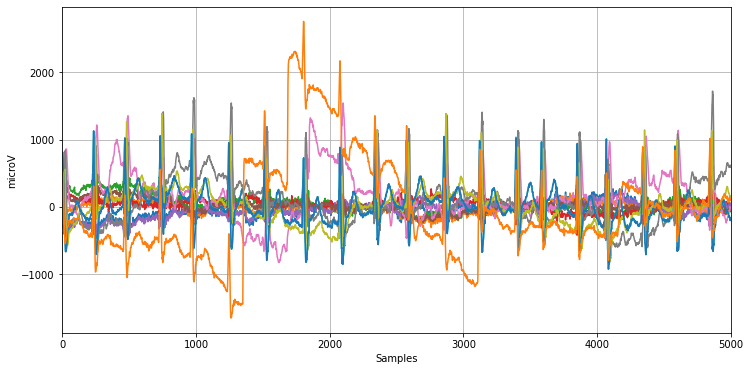

In [3]:
plot_ecg(patient_id=patient_id)

## 2. Correlation matrix for a given patient

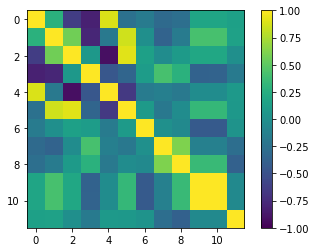

In [4]:
cor_mat = compute_corr_mat(patient_id=patient_id, plot_corr=True)

## 3. Verification that correlation matrices lies on SPD Manifold

In [5]:
check_on_manifold(cor_mat)

file_paths = get_all_file_paths()
num_files = len(file_paths)
on_manifold = 0
for file in file_paths:
    cor_mat = compute_corr_mat(file, plot_corr=False)
    if check_on_manifold(cor_mat):
        on_manifold += 1
print("Percentage of correlation matrices on SPD Manifold: {:.2f}".format((on_manifold/num_files)*100))

/Users/monsijb/.pyenv/versions/3.9.4/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/monsijb/.pyenv/versions/3.9.4/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Percentage of correlation matrices on SPD Manifold: 99.85


## 4. Different classes and instance count

| Acronym Name | Full Name                                    | Number of instances |
|--------------|----------------------------------------------|---------------------|
| SB           | Sinus Bradycardia                            | 3888                |
| SR           | Sinus Rhythm                                 | 1824                |
| AFIB         | Atrial Fibrillation                          | 1779                |
| ST           | Sinus Tachycardia                            | 1563                |
| AF           | Atrial Flutter                               | 445                 |
| SI           | Sinus Irregularity                           |  ~                  |
| SVT          | Supraventricular Tachycardia                 | 585                 |
| AT           | Atrial Tachycardia                           | 120                 |
| AVNRT        | Atrioventricular  Node Reentrant Tachycardia |  ~                  |
| AVRT         | Atrioventricular Reentrant Tachycardia       | 8                   |
| SAAWR        | Sinus Atrium to Atrial Wandering Rhythm      | ~                   |

## 5. Average correlation heatmap and standard deviations per class

- Sinus Rhythm and Sinus Bradycardia have fairly similar mean and standard deviation heatmaps (subtle differences for example bottom left of the mean heatmap)

- Atrial Fibrillation and Atrial Tachycardia have unique mean and standard deviation heatmaps when compared with the rest.

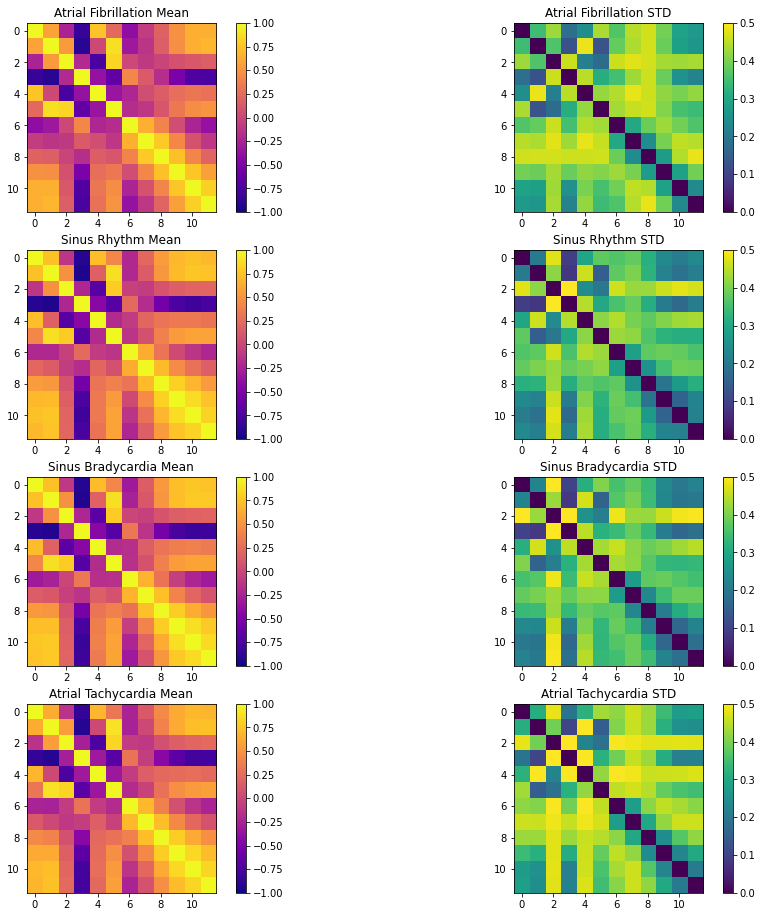

In [13]:
chosen_classes = ["164889003", "426783006", "426177001", "427084000"]
chosen_classes_names = ["Atrial Fibrillation", "Sinus Rhythm", "Sinus Bradycardia", "Atrial Tachycardia"]

file_paths = get_all_file_paths()

fig = plt.gcf()
fig.set_size_inches(16, 16)

pos = 1
for k in range(4):
    average_corr_matrix = np.zeros(np.shape(cor_mat))
    std_corr_matrix = np.zeros(np.shape(cor_mat))
    num_patients_in_class = 0
    for file in file_paths:
        if get_rhythm_id(file) == chosen_classes[k]:
            correl_mat = compute_corr_mat(file, plot_corr=False)
            if check_on_manifold(correl_mat):
                num_patients_in_class += 1
                average_corr_matrix += correl_mat
    average_corr_matrix = average_corr_matrix/num_patients_in_class
    plt.subplot(4,2,pos)
    plt.imshow(average_corr_matrix, cmap='plasma', vmin=-1, vmax=1)
    plt.title(chosen_classes_names[k] + " Mean")
    plt.colorbar()
    for file in file_paths:
        if get_rhythm_id(file) == chosen_classes[k]:
            correl_mat = compute_corr_mat(file, plot_corr=False)
            if check_on_manifold(correl_mat):
                std_corr_matrix += np.square((correl_mat - average_corr_matrix))
    plt.subplot(4,2,pos+1)
    plt.imshow(np.sqrt(std_corr_matrix/num_patients_in_class), cmap='viridis', vmax = 0.5, vmin = 0)
    plt.title(chosen_classes_names[k] + " STD")
    plt.colorbar()
    pos +=2

plt.show() 

            
            